## 문제 3: 이상치 제거 (IQR 이용)

이상치(Outlier)는 데이터의 전체적인 패턴과 동떨어진 관측치를 의미합니다.

이상치는 데이터 분석 결과를 왜곡하고, 모델의 성능을 떨어뜨릴 수 있습니다.

이상치를 탐지하고 처리하는 것은 데이터 전처리 과정에서 중요한 작업 중 하나입니다.

이번 문제에서는 IQR(Interquartile Range) 방식을 사용하여 이상치를 탐지하고 제거하는 방법을 실습합니다.

IQR은 사분위 범위로, 데이터의 상위 75%와 하위 25% 사이의 범위를 의미합니다.

IQR은 Q3(75% 분위수) - Q1(25% 분위수)로 계산합니다.

IQR을 사용하여 이상치의 경계를 계산할 수 있습니다.

이상치는 Q1 - 1.5 * IQR 보다 작거나, Q3 + 1.5 * IQR 보다 큰 경우로 정의합니다.

이상치를 제거하는 방법은 이 경계를 벗어나는 데이터를 제거하는 것입니다.

## 문제

carat 열에서 IQR 방식을 사용하여 이상치를 제거하세요.

이상치를 제거한 후 데이터의 개수를 출력하세요.

이상치의 경계를 계산하여 하한(lower bound)과 상한(upper bound) 값을 출력하세요.

데이터셋을 불러온 후, 이상치를 제거하는 코드를 작성하세요.

In [19]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

In [30]:
data = pd.read_csv('diamonds.csv')
df = pd.DataFrame(data)

# 기존 데이터 크기 확인
print("원본 데이터 개수:", df.shape[0])

원본 데이터 개수: 53940


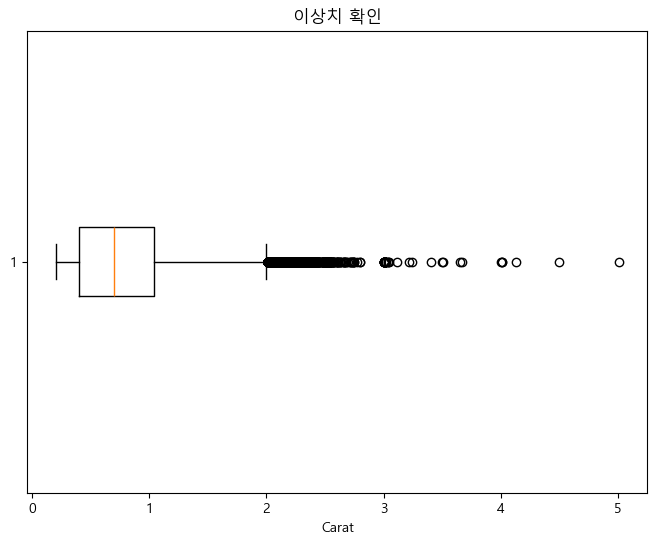

In [26]:
# 시각화로 한눈에 이상치 확인
plt.figure(figsize=(8, 6))
plt.boxplot(df['carat'], vert=False)
plt.title('이상치 확인')
plt.xlabel('Carat')
plt.show()

In [22]:
# IQR 계산
Q1 = df['carat'].quantile(0.25)
Q3 = df['carat'].quantile(0.75)
IQR = Q3 - Q1

# 하한, 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [23]:
# 이상치 제거 (하한보다 크고 상한보다 작은 값으로 다시 DataFrame 생성)
filtered_df = df[(df['carat'] >= lower_bound) & (df['carat'] <= upper_bound)]

# 결과 출력
print("이상치 하한:", lower_bound)
print("이상치 상한:", upper_bound)
print("이상치 제거 후 데이터 개수:", filtered_df.shape[0])

이상치 하한: -0.5599999999999999
이상치 상한: 2.0
이상치 제거 후 데이터 개수: 52051


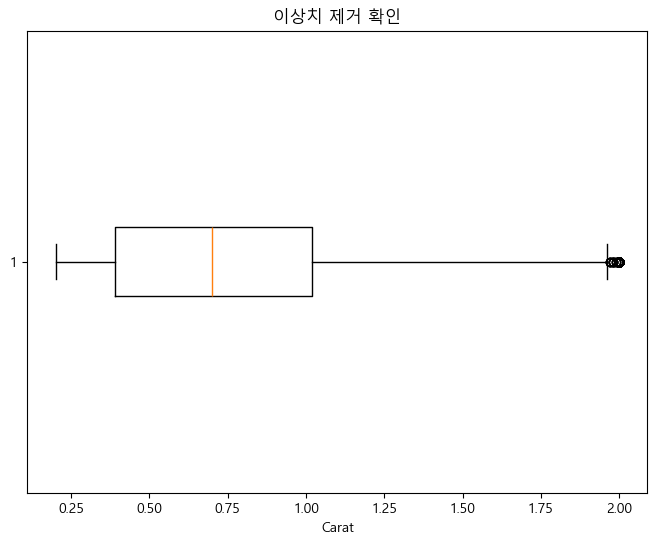

In [27]:
# 이상치 재확인
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df['carat'], vert=False)
plt.title('이상치 제거 확인')
plt.xlabel('Carat')
plt.show()